In [2]:
"""\
This script contains all the functions used to generate histogram and swarm plots in the paper "Dynamics of microcompartment formation at the mitosis-to-G1 transition".

The example histograms shown here are for the Hi-C (Zhang et al., 2019) reference dataset, while the swarm plot is for the RCMC (Goel et al., 2024) dataset.

Author: Viraat Goel
"""

# import standard python libraries
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 96
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns

import cooler
import bioframe
import cooltools
from cooltools.lib import plotting

### Load in loop calls and calculate loop distances

In [152]:
colnames=['chrom', 'start', 'end']
loops = pd.read_csv(r'FILE_PATH_TO_LOOPS.bed', sep='\t', names=colnames, header=None)
loops

,chrom,start,end
0,chr15,61855294,62205294
1,chr15,61855294,62680294
2,chr15,61857794,63605294
3,chr15,61860294,62087794
4,chr15,61860294,63475294
...,...,...,...
129,chr9,108234868,108364868
130,chr9,108244868,108359868
131,chr9,108254868,108329868
132,chr9,108269868,108359868


In [153]:
loops['distance'] = abs(loops['end'] - loops['start'])

### Plot loop distances histogram

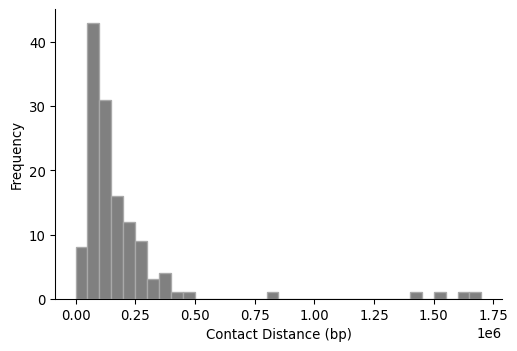

In [154]:
fig = plt.figure()
ax = fig.gca()

bins = np.arange(0, 1750000, 50000)

# Plot a histogram of loop distances
# loops.hist(column='distance', color = "gray", edgecolor = "darkgray", bins=50)
distances = loops['distance'].tolist()
ax.hist(distances, color = "gray", edgecolor = "darkgray", bins=bins)

# Set the title and axis labels
ax.set_xlabel('Contact Distance (bp)')
ax.set_ylabel('Frequency')
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

ax.grid(False)

# Display the histogram
plt.savefig('SAVE_DIRECTORY/FILE_NAME.svg', dpi=1200) # swap out .svg for the desired output file format
plt.show()

### Plot loops per anchor histogram

In [155]:
colnames=['chrom', 'min1', 'plus1']
anchors = pd.read_csv('FILE_PATH_TO_ANCHORS_PLUSMIN1kb.bed', sep='\t', names=colnames, header=None)
anchors

,chrom,min1,plus1
0,chr15,61854294,61856294
1,chr15,61856794,61858794
2,chr15,61859294,61861294
3,chr15,61864294,61866294
4,chr15,61869294,61871294
...,...,...,...
222,chr9,108333868,108335868
223,chr9,108358868,108360868
224,chr9,108363868,108365868
225,chr9,108463868,108465868


In [156]:
anchors['pos'] = anchors['min1'] + 1000
anchors

,chrom,min1,plus1,pos
0,chr15,61854294,61856294,61855294
1,chr15,61856794,61858794,61857794
2,chr15,61859294,61861294,61860294
3,chr15,61864294,61866294,61865294
4,chr15,61869294,61871294,61870294
...,...,...,...,...
222,chr9,108333868,108335868,108334868
223,chr9,108358868,108360868,108359868
224,chr9,108363868,108365868,108364868
225,chr9,108463868,108465868,108464868


In [157]:
anchorPoints = anchors['pos'].tolist()
numContacts = []

for anchor in anchorPoints:
    firstColSum = len(loops[loops['start']==anchor])
    secondColSum = len(loops[loops['end']==anchor])
    numContacts.append(firstColSum + secondColSum)

print(numContacts)

[2, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1]


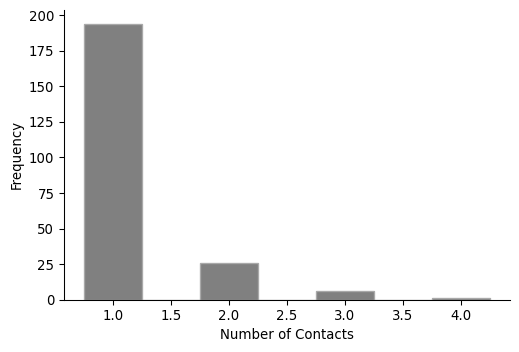

In [158]:
fig = plt.figure()
ax = fig.gca()

# Define bin edges to center on integers
bins = np.arange(0.75, 4.75, 0.5)

# Plot a histogram of loop counts
ax.hist(numContacts, color = "gray", edgecolor = "darkgray", bins=bins)

# Set the title and axis labels
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Frequency')
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

ax.grid(False)

# Display the histogram
plt.savefig('SAVE_DIRECTORY/FILE_NAME.svg', dpi=1200) # swap out .svg for the desired output file format
plt.show()

### Calculate statistics for both histogram plots

In [159]:
print('Contact distances, mean: ' + str(np.mean(distances)))
print('Contact distances, median: ' + str(np.median(distances)))
print('Number of contacts, mean: ' + str(np.mean(numContacts)))
print('Number of contacts, median: ' + str(np.median(numContacts)))

Contact distances, mean: 202437.81343283583
Contact distances, median: 118750.0
Number of contacts, mean: 1.1806167400881058
Number of contacts, median: 1.0


### Generate swarm plot of number of loops per anchor, by anchor class

In [11]:
colnames=['chrom', 'start', 'end']

promoters = pd.read_csv('FILE_PATH_TO_PROMOTER_ANCHORS_PLUSMIN1kb.bed', sep='\t', names=colnames, header=None)
enhancers = pd.read_csv('FILE_PATH_TO_ENHANCER_ANCHORS_PLUSMIN1kb.bed', sep='\t', names=colnames, header=None)
ctcf_cohesin = pd.read_csv('FILE_PATH_TO_CTCF_ANCHORS_PLUSMIN1kb.bed', sep='\t', names=colnames, header=None)
other = pd.read_csv('FILE_PATH_TO_OTHER_ANCHORS_PLUSMIN1kb.bed', sep='\t', names=colnames, header=None)

promoters['point'] = (promoters['start'] + promoters['end']) // 2
enhancers['point'] = (enhancers['start'] + enhancers['end']) // 2
ctcf_cohesin['point'] = (ctcf_cohesin['start'] + ctcf_cohesin['end']) // 2
other['point'] = (other['start'] + other['end']) // 2

promoters_list = promoters['point'].to_list()
enhancers_list = enhancers['point'].to_list()
ctcf_cohesin_list = ctcf_cohesin['point'].to_list()
other_list = other['point'].to_list()

In [12]:
promoter_loops = loops[loops['start'].isin(promoters_list) | loops['end'].isin(promoters_list)]
enhancer_loops = loops[loops['start'].isin(enhancers_list) | loops['end'].isin(enhancers_list)]
ctcf_cohesin_loops = loops[loops['start'].isin(ctcf_cohesin_list) | loops['end'].isin(ctcf_cohesin_list)]
other_loops = loops[loops['start'].isin(other_list) | loops['end'].isin(other_list)]
promoter_loops

,chrom,start,end,distance
0,chr2,151947220,152068720,121500
1,chr2,151947220,152135620,188400
2,chr2,151947220,152174000,226780
3,chr2,151947220,152187400,240180
4,chr2,151947220,152239250,292030
...,...,...,...,...
3296,chr15,62094000,63524500,1430500
3297,chr15,62094000,63529400,1435400
3298,chr15,62094000,63593400,1499400
3299,chr15,62094000,63608290,1514290


In [13]:
promoters_dist = promoter_loops['distance'].to_list()
enhancers_dist = enhancer_loops['distance'].to_list()
ctcf_cohesin_dist = ctcf_cohesin_loops['distance'].to_list()
other_dist = other_loops['distance'].to_list()

In [15]:
promoterContacts = []
for anchor in promoters_list:
    firstColSum = len(promoter_loops[promoter_loops['start']==anchor])
    secondColSum = len(promoter_loops[promoter_loops['end']==anchor])
    promoterContacts.append(firstColSum + secondColSum)

enhancerContacts = []
for anchor in enhancers_list:
    firstColSum = len(enhancer_loops[enhancer_loops['start']==anchor])
    secondColSum = len(enhancer_loops[enhancer_loops['end']==anchor])
    enhancerContacts.append(firstColSum + secondColSum)
    
ctcf_cohesin_Contacts = []
for anchor in ctcf_cohesin_list:
    firstColSum = len(ctcf_cohesin_loops[ctcf_cohesin_loops['start']==anchor])
    secondColSum = len(ctcf_cohesin_loops[ctcf_cohesin_loops['end']==anchor])
    ctcf_cohesin_Contacts.append(firstColSum + secondColSum)

otherContacts = []
for anchor in other_list:
    firstColSum = len(other_loops[other_loops['start']==anchor])
    secondColSum = len(other_loops[other_loops['end']==anchor])
    otherContacts.append(firstColSum + secondColSum)

print(promoterContacts)

[17, 17, 18, 18, 0, 18, 0, 18, 17, 8, 0, 0, 0, 19, 18, 18, 1, 19, 18, 6, 1, 21, 15, 8, 40, 42, 42, 39, 11, 42, 41, 39, 39, 2, 37, 22, 35, 43, 40, 43, 37, 8, 6, 37, 44, 40, 40, 38, 29, 34, 20, 5, 41, 47, 46, 45, 46, 1, 41, 43, 42, 1, 43, 43, 43, 43, 43, 43, 43, 0, 43, 41, 41, 41, 41, 42, 4, 40, 43, 43, 18, 43, 43, 7, 43, 35, 28, 33, 48, 8, 42, 6, 45, 42, 41, 10, 3, 43, 39, 7, 37, 5, 39, 48, 41, 10, 47, 46, 42, 19, 47, 24, 15, 49, 49, 10, 49, 53, 7, 41, 11, 46, 51, 43, 50, 47, 48, 47, 48, 44, 46, 29, 24, 30, 47, 19, 25, 13, 6, 22]


In [31]:
promoterCount = pd.DataFrame(data=promoterContacts)
promoterCount = promoterCount.rename(columns={0: 'count'})
promoterCount['type'] = 'promoter'

enhancerCount = pd.DataFrame(data=enhancerContacts)
enhancerCount = enhancerCount.rename(columns={0: 'count'})
enhancerCount['type'] = 'enhancer'

ctcfCount = pd.DataFrame(data=ctcf_cohesin_Contacts)
ctcfCount = ctcfCount.rename(columns={0: 'count'})
ctcfCount['type'] = 'ctcf'

otherCount = pd.DataFrame(data=otherContacts)
otherCount = otherCount.rename(columns={0: 'count'})
otherCount['type'] = 'other'

promoterCount

,count,type
0,17,promoter
1,17,promoter
2,18,promoter
3,18,promoter
4,0,promoter
...,...,...
135,19,promoter
136,25,promoter
137,13,promoter
138,6,promoter


In [33]:
combinedCount = pd.concat([promoterCount, enhancerCount, ctcfCount, otherCount])
combinedCount

,count,type
0,17,promoter
1,17,promoter
2,18,promoter
3,18,promoter
4,0,promoter
...,...,...
73,2,other
74,10,other
75,11,other
76,6,other


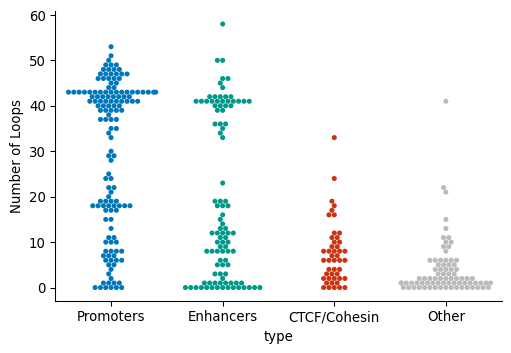

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot
ax = sns.swarmplot(x="type", y="count", data=combinedCount, palette=['#0077BB','#009988','#CC3311','#BBBBBB'], s=3.8)

# Set custom x-axis labels
ax.set_xticklabels(['Promoters', 'Enhancers', 'CTCF/Cohesin', 'Other'])
ax.set_ylabel('Number of Loops')
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Show the plot
plt.savefig('SAVE_DIRECTORY/FILE_NAME.svg', dpi=1200) # swap out .svg for the desired output file format
plt.show()